In [3]:
!pip list

Package                       Version
----------------------------- ---------------
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
black                         22.6.0
bleac

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
fb = pd.read_csv('data/facebook.csv')
ms = pd.read_csv('data/microsoft.csv')

In [48]:
print(type(fb))

<class 'pandas.core.frame.DataFrame'>


In [56]:
fb.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200
5,2015-01-08,19.360001,19.980000,19.350000,19.860001,19.274870,7094500
6,2015-01-09,19.930000,20.090000,19.660000,19.940001,19.352512,5238500
7,2015-01-12,19.990000,20.000000,19.510000,19.690001,19.109879,4768300
8,2015-01-13,19.840000,20.240000,19.520000,19.660000,19.080761,5909700
9,2015-01-14,19.450001,19.799999,19.400000,19.740000,19.158401,3881500


In [50]:
fb.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
770,2018-01-23,235.850006,239.830002,235.100006,238.910004,238.910004,11880700
771,2018-01-24,239.039993,240.490005,233.550003,235.800003,235.800003,14499300
772,2018-01-25,238.000000,239.750000,235.750000,236.350006,236.350006,10247100
773,2018-01-26,238.119995,243.339996,237.600006,243.330002,243.330002,12908900
774,2018-01-29,242.740005,248.110001,240.610001,246.850006,246.850006,11377900
775,2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800
776,2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400
777,2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600
778,2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600
779,2018-02-05,227.000000,233.229996,205.000000,213.699997,213.699997,28869000


In [51]:
fb.describe()

,Open,High,Low,Close,Adj Close,Volume
count,780.000000,780.000000,780.000000,780.000000,780.000000,7.800000e+02
mean,80.212705,81.285654,79.022397,80.264897,79.914215,1.204453e+07
std,64.226121,65.048907,63.190963,64.198375,64.327846,8.221848e+06
min,19.250000,19.500000,18.940001,19.139999,18.576082,1.311200e+06
25%,25.525000,26.085000,24.845000,25.475000,25.134512,7.215200e+06
50%,53.379999,54.034999,52.930000,53.420000,53.035403,9.728700e+06
75%,113.322502,115.779999,110.297499,113.702501,113.261238,1.408885e+07
max,245.770004,249.270004,244.449997,246.850006,246.850006,9.232320e+07


In [57]:
# Converter a coluna "Date" para o formato datetime
fb["Date"] = pd.to_datetime(fb["Date"])

# Definir "Date" como índice
fb.set_index("Date", inplace=True)

In [58]:
fb.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200
2015-01-08,19.360001,19.980000,19.350000,19.860001,19.274870,7094500
2015-01-09,19.930000,20.090000,19.660000,19.940001,19.352512,5238500
2015-01-12,19.990000,20.000000,19.510000,19.690001,19.109879,4768300
2015-01-13,19.840000,20.240000,19.520000,19.660000,19.080761,5909700


In [59]:
fb.index

DatetimeIndex(['2014-12-31', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26',
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-05'],
              dtype='datetime64[ns]', name='Date', length=780, freq=None)

In [60]:
fb.index[0]

Timestamp('2014-12-31 00:00:00')

In [61]:
fb.index[-1]

Timestamp('2018-02-05 00:00:00')

In [62]:
fb.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [63]:
#Fechamento do valor de ação no dia 05/01/2015
fb.loc['2015-01-05', 'Low']

19.700001

In [64]:
#Fechamento do valor de ação no dia 05/01/2015
fb.iloc[2,2] # A posição inicia em 0

19.700001

In [65]:
#Fechamento do valor de ação no ano de 2015
fb.loc['2015-01-05':'2015-12-31','Low']

Date
2015-01-05    19.700001
2015-01-06    19.170000
2015-01-07    19.080000
2015-01-08    19.350000
2015-01-09    19.660000
                ...    
2015-12-24    32.910000
2015-12-28    32.360001
2015-12-29    33.070000
2015-12-30    33.380001
2015-12-31    32.959999
Name: Low, Length: 251, dtype: float64

<Axes: xlabel='Date'>

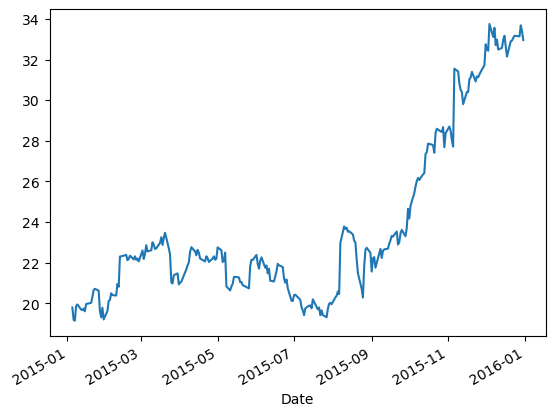

In [69]:
# Visualizando o stock price (valor da ação) de 2015
fb.loc['2015-01-05':'2015-12-31','Close'].plot()

<Axes: xlabel='Date'>

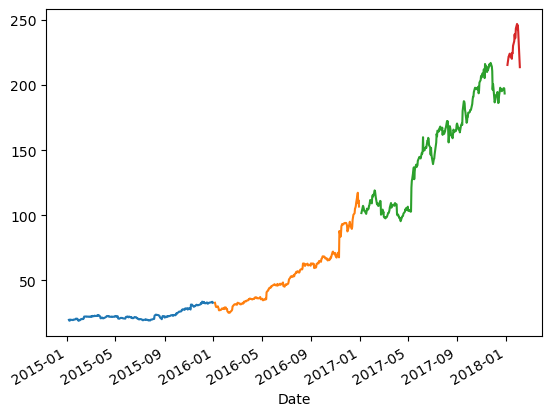

In [72]:
# Visulizando o stock price entre 2015 - 2018
fb.loc['2015-01-05':'2015-12-31','Close'].plot()
fb.loc['2016-01-05':'2016-12-31','Close'].plot()
fb.loc['2017-01-05':'2017-12-31','Close'].plot()
fb.loc['2018-01-05':'2018-12-31','Close'].plot()